# STAFF PROMOTION

IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
import os
print("Setup Complete")

Setup Complete


In [2]:
# Import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [3]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [4]:
print(train.dtypes)

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
Promoted_or_Not                          int64
dtype: object


In [5]:

print(train["Division"].unique())
print(train['Qualification'].unique())
print(train['Gender'].unique())
print(train['Channel_of_Recruitment'].unique())
print(train['State_Of_Origin'].unique())
print(train['Foreign_schooled'].unique())
print(train['Marital_Status'].unique())
print(train['Past_Disciplinary_Action'].unique())
print(train['Previous_IntraDepartmental_Movement'].unique())
print(train["No_of_previous_employers"].unique())

['Commercial Sales and Marketing' 'Customer Support and Field Operations'
 'Information and Strategy' 'Information Technology and Solution Support'
 'Sourcing and Purchasing' 'Business Finance Operations'
 'People/HR Management' 'Research and Innovation'
 'Regulatory and Legal services']
['MSc, MBA and PhD' 'First Degree or HND' nan 'Non-University Education']
['Female' 'Male']
['Direct Internal process' 'Agency and others'
 'Referral and Special candidates']
['ANAMBRA' 'KATSINA' 'NIGER' 'AKWA IBOM' 'ENUGU' 'OYO' 'LAGOS' 'ONDO'
 'KWARA' 'EDO' 'BAUCHI' 'TARABA' 'RIVERS' 'KADUNA' 'PLATEAU' 'EKITI'
 'BORNO' 'IMO' 'CROSS RIVER' 'KANO' 'FCT' 'OGUN' 'GOMBE' 'DELTA' 'BENUE'
 'ZAMFARA' 'OSUN' 'ABIA' 'KEBBI' 'ADAMAWA' 'NASSARAWA' 'SOKOTO' 'KOGI'
 'JIGAWA' 'BAYELSA' 'YOBE' 'EBONYI']
['No' 'Yes']
['Married' 'Single' 'Not_Sure']
['No' 'Yes']
['No' 'Yes']
['0' '1' '4' '3' '2' 'More than 5' '5']


In [6]:
print(train['Targets_met'].value_counts()) 
print(train["Trainings_Attended"].value_counts())
print(train["Previous_Award"].value_counts())
print(train["Division"].value_counts())
print(train['Qualification'].value_counts())
print(train['Gender'].value_counts())
print(train['Channel_of_Recruitment'].value_counts())
print(train['State_Of_Origin'].value_counts())
print(train['Foreign_schooled'].value_counts())
print(train['Marital_Status'].value_counts())
print(train['Past_Disciplinary_Action'].value_counts())
print(train['Previous_IntraDepartmental_Movement'].value_counts())
print(train["No_of_previous_employers"].value_counts())

0    24788
1    13524
Name: Targets_met, dtype: int64
2     30981
3      5631
4      1244
5       316
6        93
7        28
8         6
10        5
11        4
9         4
Name: Trainings_Attended, dtype: int64
0    37425
1      887
Name: Previous_Award, dtype: int64
Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64
First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64
Male      26880
Female    11432
Name: Gender, dtype: int64
Agency and others            

In [7]:
print("train_data shape :", train.shape)
print("test_data shape :", test.shape)

train_data shape : (38312, 19)
test_data shape : (16496, 18)


In [8]:
print(train.describe())

       Trainings_Attended  Year_of_birth  Last_performance_score  \
count        38312.000000   38312.000000            38312.000000   
mean             2.253680    1986.209334                7.698959   
std              0.609443       7.646047                3.744135   
min              2.000000    1950.000000                0.000000   
25%              2.000000    1982.000000                5.000000   
50%              2.000000    1988.000000                7.500000   
75%              2.000000    1992.000000               10.000000   
max             11.000000    2001.000000               12.500000   

       Year_of_recruitment   Targets_met  Previous_Award  \
count         38312.000000  38312.000000    38312.000000   
mean           2013.139695      0.352996        0.023152   
std               4.261451      0.477908        0.150388   
min            1982.000000      0.000000        0.000000   
25%            2012.000000      0.000000        0.000000   
50%            2014.000000 

In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [10]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64


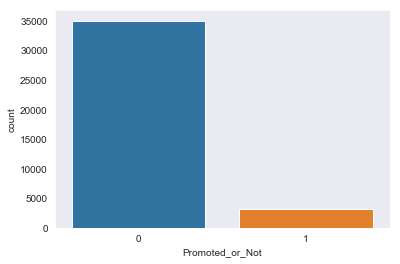

In [11]:
# Explore Dataset
sns.set_style("dark")
sns.countplot(x = "Promoted_or_Not", data = train)

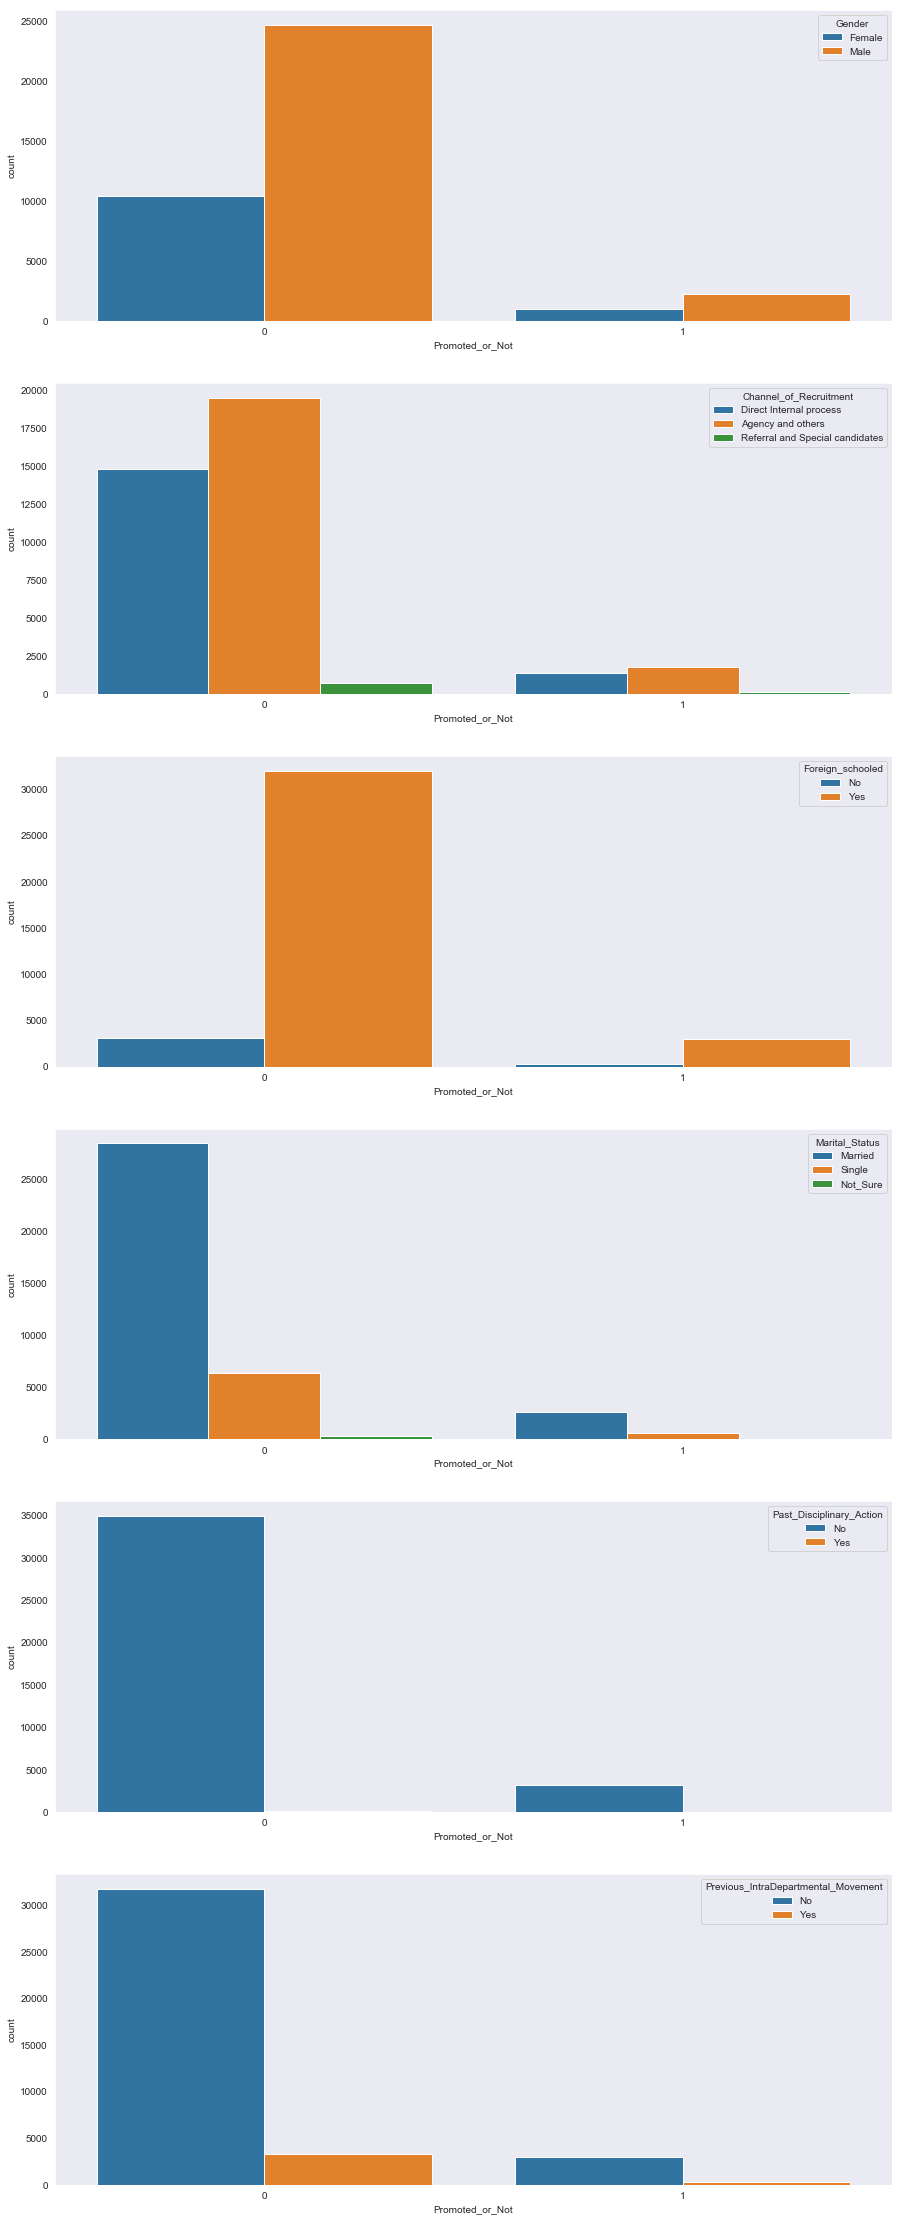

In [12]:
f, axes = plt.subplots(6, 1, figsize=[15, 40])


sns.countplot(x = "Promoted_or_Not", hue="Gender", data = train, ax=axes[0])
sns.countplot(x = "Promoted_or_Not", hue="Channel_of_Recruitment", data = train , ax=axes[1])
sns.countplot(x = "Promoted_or_Not", hue="Foreign_schooled", data = train, ax=axes[2])

sns.countplot(x = "Promoted_or_Not", hue="Marital_Status", data= train , ax=axes[3])
sns.countplot(x = "Promoted_or_Not", hue="Past_Disciplinary_Action", data = train, ax=axes[4])
sns.countplot(x = "Promoted_or_Not", hue="Previous_IntraDepartmental_Movement", data = train, ax=axes[5])

(array([ 432., 7970., 5874., 7682., 3196., 3267., 3391., 4982., 1260.,
         258.]),
 array([31., 37., 43., 49., 55., 61., 67., 73., 79., 85., 91.]),
 <a list of 10 Patch objects>)

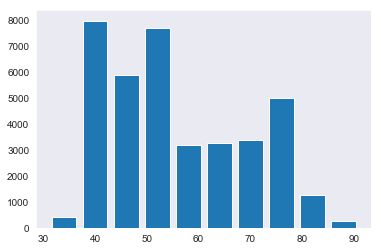

In [13]:
plt.hist(train['Training_score_average'], histtype = 'bar',rwidth = 0.8)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [15]:
floats_columns = train[["Training_score_average","Trainings_Attended","Year_of_birth","Year_of_recruitment","Targets_met",
                       "Previous_Award"]].values.astype(float)


In [16]:
categorical = ['Division', 'Channel_of_Recruitment', 'State_Of_Origin', 'Marital_Status', "No_of_previous_employers"]
train_dummies = pd.get_dummies(train, prefix_sep='_', columns = categorical, drop_first = True)
test_dummies = pd.get_dummies(test, prefix_sep="_", columns = categorical, drop_first = True)

In [17]:
train = train_dummies
test = test_dummies

In [18]:
train.head()
train.shape

(38312, 68)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
train['Gender'] = le.fit_transform(train['Gender'])
train['Foreign_schooled'] = le.fit_transform(train['Foreign_schooled'])
train['Past_Disciplinary_Action'] = le.fit_transform(train['Past_Disciplinary_Action'])
train['Previous_IntraDepartmental_Movement'] = le.fit_transform(train['Previous_IntraDepartmental_Movement'])

In [21]:
train.head()

,EmployeeNo,Qualification,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,...,State_Of_Origin_YOBE,State_Of_Origin_ZAMFARA,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,YAK/S/00001,"MSc, MBA and PhD",0,2,1986,12.5,2011,1,0,41,...,0,0,0,0,0,0,0,0,0,0
1,YAK/S/00002,First Degree or HND,1,2,1991,12.5,2015,0,0,52,...,0,0,0,0,0,0,0,0,0,0
2,YAK/S/00003,First Degree or HND,1,2,1987,7.5,2012,0,0,42,...,0,0,0,0,0,0,0,0,0,0
3,YAK/S/00004,First Degree or HND,1,3,1982,2.5,2009,0,0,42,...,0,0,0,1,1,0,0,0,0,0
4,YAK/S/00006,First Degree or HND,1,3,1990,7.5,2012,0,0,77,...,0,0,0,0,1,0,0,0,0,0


In [22]:
test['Gender'] = le.fit_transform(test['Gender'])
test['Foreign_schooled'] = le.fit_transform(test['Foreign_schooled'])
test['Past_Disciplinary_Action'] = le.fit_transform(test['Past_Disciplinary_Action'])
test['Previous_IntraDepartmental_Movement'] = le.fit_transform(test['Previous_IntraDepartmental_Movement'])

In [23]:
test.head()

,EmployeeNo,Qualification,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,...,State_Of_Origin_YOBE,State_Of_Origin_ZAMFARA,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,YAK/S/00005,First Degree or HND,1,2,1976,7.5,2017,0,0,65,...,0,0,0,0,1,0,0,0,0,0
1,YAK/S/00011,NaN,1,2,1991,0.0,2018,0,0,69,...,0,0,0,0,1,0,0,0,0,0
2,YAK/S/00015,"MSc, MBA and PhD",1,2,1984,7.5,2012,0,0,76,...,0,0,0,0,1,0,0,0,0,0
3,YAK/S/00016,First Degree or HND,1,2,1984,2.5,2009,0,0,52,...,0,0,0,1,1,0,0,0,0,0
4,YAK/S/00017,First Degree or HND,1,2,1983,7.5,2014,1,0,69,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Seperate training features from target
X_train = train.drop(['EmployeeNo', 'Qualification',"Promoted_or_Not"], axis=1)

In [25]:
y_train = train['Promoted_or_Not']

In [26]:
X_test = test.drop(['EmployeeNo', 'Qualification'], axis=1)

In [27]:
X_test.head()

,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,...,State_Of_Origin_YOBE,State_Of_Origin_ZAMFARA,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,1,2,1976,7.5,2017,0,0,65,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,2,1991,0.0,2018,0,0,69,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2,1984,7.5,2012,0,0,76,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,2,1984,2.5,2009,0,0,52,0,0,...,0,0,0,1,1,0,0,0,0,0
4,1,2,1983,7.5,2014,1,0,69,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_train.head()

,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,...,State_Of_Origin_YOBE,State_Of_Origin_ZAMFARA,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,0,2,1986,12.5,2011,1,0,41,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1991,12.5,2015,0,0,52,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1987,7.5,2012,0,0,42,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,1982,2.5,2009,0,0,42,1,0,...,0,0,0,1,1,0,0,0,0,0
4,1,3,1990,7.5,2012,0,0,77,1,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
X_test.isnull().sum()

Gender                                                    0
Trainings_Attended                                        0
Year_of_birth                                             0
Last_performance_score                                    0
Year_of_recruitment                                       0
Targets_met                                               0
Previous_Award                                            0
Training_score_average                                    0
Foreign_schooled                                          0
Past_Disciplinary_Action                                  0
Previous_IntraDepartmental_Movement                       0
Division_Commercial Sales and Marketing                   0
Division_Customer Support and Field Operations            0
Division_Information Technology and Solution Support      0
Division_Information and Strategy                         0
Division_People/HR Management                             0
Division_Regulatory and Legal services  

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))


In [32]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [33]:
X_train_scaled.shape

(38312, 65)

In [34]:
X_test_scaled.shape

(16496, 65)

In [35]:
from sklearn.model_selection import train_test_split
X_Train, X_valid, y_Train, y_valid = train_test_split(X_train_scaled, y_train, stratify = y_train, test_size = 0.2,
                                                      shuffle = True,random_state=42)

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [37]:
X_Train_new, y_Train_new = sm.fit_sample(X_Train, y_Train.ravel())

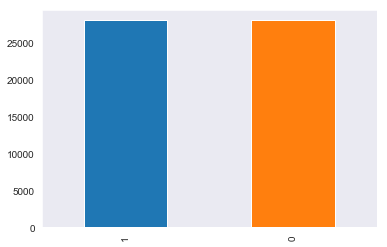

In [38]:
pd.Series(y_Train_new).value_counts().plot.bar()

In [39]:
from xgboost import XGBClassifier

xgmodel1 = XGBClassifier ()

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
subsamples = [0.5, 0.6, 0.8, 1.0]
gammas = [0.1, 1, 1.5, 2, 5]
min_child_weights = [1, 5, 10]
colsample_bytrees = [0.5, 0.6, 0.8, 1.0]
max_depths = [3, 4, 5]

In [42]:
param_grid =  dict(subsample=subsamples, gamma=gammas, min_child_weight=min_child_weights, colsample_bytree = colsample_bytrees,
                  max_depth = max_depths)

In [43]:
xgmodel2 = GridSearchCV(xgmodel1, param_grid)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [45]:
xgmodel3 = XGBClassifier(min_child_weight = 5, gamma = 0.5, subsample = 0.6, colsample_bytree = 0.6,
                        max_depth = 5)


In [46]:
xgmodel3.fit(X_Train, y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.6, gamma=0.5, learning_rate=0.1,
              max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.6)

In [47]:
y_pred = xgmodel3.predict(X_valid)

In [48]:
print("error rate:", 1 - accuracy_score(y_valid, y_pred))

error rate: 0.05885423463395534


In [49]:
confusion_matrix(y_pred, y_valid)

array([[7007,  443],
       [   8,  205]], dtype=int64)

In [50]:
test_pred = xgmodel3.predict(X_test_scaled)

In [51]:
sample = pd.read_csv("sample_submission2.csv")

In [52]:
sample.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/34385,1
1,YAK/S/27825,1
2,YAK/S/23870,1
3,YAK/S/54784,1
4,YAK/S/25058,1


In [53]:
submission2= pd.DataFrame({"EmployeeNO": test['EmployeeNo'],
                          "Promoted_or_Not": test_pred})

In [54]:
submission2.head()

,EmployeeNO,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [55]:
submission2.to_csv('subfile2.csv', index = False)